# 1-Axis shading PVSC2018, Fig. 13

Redoing PVSC 2018 fig. 13 with the bifacial_radiance v. 0.3.1. Many things have been updated since this paper, simplifying the generation of this plot:
    - Sensor position is now always generated E to W on N-S tracking systems, so same sensor positions can just be added for this calculation at the end without needing to flip the sensors.
    - Torquetubes get automatically generated in makeModule. Following PVSC 2018 paper, rotation is around the modules and not around the torque tube axis (which is a new feature)
    - Simulating only 1 day on single-axis tracking easier with cumulativesky = False and gendaylit1axis(startdate='06/24', enddate='06/24' 
    - Sensors get generated very close to surface, so all results are from the module surface and not the torquetube for this 1-UP case.
    

In [1]:
import os
testfolder = os.path.abspath(r'..\bifacial_radiance\TEMP')  

# You can alternatively point to an empty directory (it will open a load GUI Visual Interface)
# or specify any other directory in your computer. I.E.:
# testfolder = r'C:\Users\sayala\Documents\RadianceScenes\Demo'

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP


In [33]:
# VARIABLES of the simulation: 
lat = 35.1 # ABQ
lon = -106.7 # ABQ
x=1
y = 2 
numpanels=1
limit_angle = 45 # tracker rotation limit angle
albedo = 'concrete'     # ground albedo
hub_height = y*0.75   # H = 0.75 
gcr = 0.35  
pitch = y/gcr
#pitch = 1.0/gcr # Check from 1Axis_Shading_PVSC2018 file
cumulativesky = False # needed for set1axis and makeScene1axis so simulation is done hourly not with gencumsky.
limit_angle = 45 # tracker rotation limit angle
nMods=10
nRows=3
sensorsy = 200
module_type='Prism Solar Bi60'
datewanted='06/24' # sunny day 6/24/1972 (index 4180 - 4195)

## Torque tube info
torquetube = False # redefined on each simulation below, since we need to compare with and without torque tube.
tubetype='round'
material = 'Metal_Grey'
diameter = 0.1
axisofrotationTorqueTube = False   # Original PVSC version rotated around the modules like most other softwares.
# Variables that will get defined on each iteration below:
zgap = 0.1 # 0.2, 0.3 values tested. Re-defined on each simulation.
torquetube = False # baseline is no torque tube. 

In [3]:
# Simulation Start.

try:
    from bifacial_radiance import RadianceObj, AnalysisObj
except ImportError:
    raise RuntimeError('bifacial_radiance is required. download distribution')
import numpy as np

demo = RadianceObj(path = testfolder)  
demo.setGround(albedo)
epwfile = demo.getEPW(lat, lon) 
metdata = demo.readEPW(epwfile) 
trackerdict = demo.set1axis(metdata, limit_angle = limit_angle, backtrack = True, gcr = gcr, cumulativesky = False)
trackerdict = demo.gendaylit1axis(startdate=, enddate=datewanted) 
sceneDict = {'pitch':pitch,'hub_height':hub_height, 'nMods': nMods, 'nRows': nRows}  


path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP
Getting weather file: USA_NM_Albuquerque.723650_TMY2.epw
 ... OK!


c:\users\sayala\documents\github\bifacial_radiance\bifacial_radiance\main.py:2465: pvlibDeprecationWarning: The get_sun_rise_set_transit function was deprecated in pvlib 0.6.1 and will be removed in 0.7. Use sun_rise_set_transit_spa instead.
  sunup= pvlib.irradiance.solarposition.get_sun_rise_set_transit(datetimetz, lat, lon) #only for pvlib <0.6.1
C:\ProgramData\Anaconda3\lib\site-packages\pvlib\tracking.py:428: RuntimeWarning: invalid value encountered in arccos
  wc = np.degrees(np.arccos(temp))
C:\ProgramData\Anaconda3\lib\site-packages\pvlib\tracking.py:431: RuntimeWarning: invalid value encountered in less
  tracker_theta = np.where(wid < 0, wid + wc, wid - wc)
C:\ProgramData\Anaconda3\lib\site-packages\pvlib\tracking.py:435: RuntimeWarning: invalid value encountered in greater
  tracker_theta[tracker_theta > max_angle] = max_angle
C:\ProgramData\Anaconda3\lib\site-packages\pvlib\tracking.py:436: RuntimeWarning: invalid value encountered in less
  tracker_theta[tracker_theta < -

Creating ~4000 skyfiles.  Takes 1-2 minutes
Created 14 skyfiles in /skies/


# Zgaps 0.1, 0.2 and 0.3

In [35]:
#CASE 0 No torque tube
# When torquetube is False, zgap is the distance from axis of torque tube to module surface, but since we are rotating from the module's axis, this Zgap doesn't matter.
# zgap = 0.1 + diameter/2.0  
torquetube = False 
customname = '_NoTT'
demo.makeModule(name=module_type,x=x,y=y, numpanels=numpanels, torquetube=torquetube, axisofrotationTorqueTube=axisofrotationTorqueTube)
trackerdict = demo.makeScene1axis(trackerdict,module_type,sceneDict, cumulativesky = cumulativesky) 
trackerdict = demo.makeOct1axis(trackerdict)
trackerdict = demo.analysis1axis(trackerdict, sensorsy = sensorsy, customname = customname)



Module Name: Prism_Solar_Bi60
REWRITING pre-existing module file. 
Module Prism Solar Bi60 successfully created

Making ~4000 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/

Making 14 octfiles for 1-axis tracking in root directory.
Created 1axis_06_24_06.oct
Created 1axis_06_24_07.oct
Created 1axis_06_24_08.oct
Created 1axis_06_24_09.oct
Created 1axis_06_24_10.oct
Created 1axis_06_24_11.oct
Created 1axis_06_24_12.oct
Created 1axis_06_24_13.oct
Created 1axis_06_24_14.oct
Created 1axis_06_24_15.oct
Created 1axis_06_24_16.oct
Created 1axis_06_24_17.oct
Created 1axis_06_24_18.oct
Created 1axis_06_24_19.oct
Linescan in process: 1axis_06_24_06_NoTT_Front
Linescan in process: 1axis_06_24_06_NoTT_Back
Saved: results\irr_1axis_06_24_06_NoTT.csv
Index: 06_24_06. Wm2Front: 88.48832853333333. Wm2Back: 16.285082883333335
Linescan in process: 1axis_06_24_07_NoTT_Front
Linescan in process: 1axis_06_24_07_NoTT_Back
Saved: results\irr_1axis_06_24_07_N

In [36]:
#ZGAP 0.1 
zgap = 0.1
torquetube = True
customname = '_zgap0.1'
demo.makeModule(name=module_type,x=x,y=y, numpanels=numpanels,tubetype=tubetype, zgap=zgap, torquetube=torquetube, diameter=diameter, material=material, axisofrotationTorqueTube=axisofrotationTorqueTube)
trackerdict = demo.makeScene1axis(trackerdict,module_type,sceneDict, cumulativesky = cumulativesky) 
trackerdict = demo.makeOct1axis(trackerdict)
trackerdict = demo.analysis1axis(trackerdict, sensorsy = sensorsy, customname = customname)


Module Name: Prism_Solar_Bi60
REWRITING pre-existing module file. 
Module Prism Solar Bi60 successfully created

Making ~4000 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/

Making 14 octfiles for 1-axis tracking in root directory.
Created 1axis_06_24_06.oct
Created 1axis_06_24_07.oct
Created 1axis_06_24_08.oct
Created 1axis_06_24_09.oct
Created 1axis_06_24_10.oct
Created 1axis_06_24_11.oct
Created 1axis_06_24_12.oct
Created 1axis_06_24_13.oct
Created 1axis_06_24_14.oct
Created 1axis_06_24_15.oct
Created 1axis_06_24_16.oct
Created 1axis_06_24_17.oct
Created 1axis_06_24_18.oct
Created 1axis_06_24_19.oct
Linescan in process: 1axis_06_24_06_zgap0.1_Front
Linescan in process: 1axis_06_24_06_zgap0.1_Back
Saved: results\irr_1axis_06_24_06_zgap0.1.csv
Index: 06_24_06. Wm2Front: 88.58183291666666. Wm2Back: 15.520940971666667
Linescan in process: 1axis_06_24_07_zgap0.1_Front
Linescan in process: 1axis_06_24_07_zgap0.1_Back
Saved: results\irr_1

In [37]:
#ZGAP 0.2
zgap = 0.2
torquetube = True
customname = '_zgap0.2'
demo.makeModule(name=module_type,x=x,y=y, numpanels=numpanels,tubetype=tubetype, zgap=zgap, torquetube=torquetube, diameter=diameter, material=material, axisofrotationTorqueTube=axisofrotationTorqueTube)
trackerdict = demo.makeScene1axis(trackerdict,module_type,sceneDict, cumulativesky = cumulativesky) 
trackerdict = demo.makeOct1axis(trackerdict)
trackerdict = demo.analysis1axis(trackerdict, sensorsy = sensorsy, customname = customname)


Module Name: Prism_Solar_Bi60
REWRITING pre-existing module file. 
Module Prism Solar Bi60 successfully created

Making ~4000 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/

Making 14 octfiles for 1-axis tracking in root directory.
Created 1axis_06_24_06.oct
Created 1axis_06_24_07.oct
Created 1axis_06_24_08.oct
Created 1axis_06_24_09.oct
Created 1axis_06_24_10.oct
Created 1axis_06_24_11.oct
Created 1axis_06_24_12.oct
Created 1axis_06_24_13.oct
Created 1axis_06_24_14.oct
Created 1axis_06_24_15.oct
Created 1axis_06_24_16.oct
Created 1axis_06_24_17.oct
Created 1axis_06_24_18.oct
Created 1axis_06_24_19.oct
Linescan in process: 1axis_06_24_06_zgap0.2_Front
Linescan in process: 1axis_06_24_06_zgap0.2_Back
Saved: results\irr_1axis_06_24_06_zgap0.2.csv
Index: 06_24_06. Wm2Front: 88.42154908333333. Wm2Back: 15.69160255
Linescan in process: 1axis_06_24_07_zgap0.2_Front
Linescan in process: 1axis_06_24_07_zgap0.2_Back
Saved: results\irr_1axis_06

In [38]:
#ZGAP 0.3
zgap = 0.3
torquetube = True
customname = '_zgap0.3'
demo.makeModule(name=module_type,x=x,y=y, numpanels=numpanels,tubetype=tubetype, zgap=zgap, torquetube=torquetube, diameter=diameter, material=material, axisofrotationTorqueTube=axisofrotationTorqueTube)
trackerdict = demo.makeScene1axis(trackerdict,module_type,sceneDict, cumulativesky = cumulativesky) 
trackerdict = demo.makeOct1axis(trackerdict)
trackerdict = demo.analysis1axis(trackerdict, sensorsy = sensorsy, customname = customname)


Module Name: Prism_Solar_Bi60
REWRITING pre-existing module file. 
Module Prism Solar Bi60 successfully created

Making ~4000 .rad files for gendaylit 1-axis workflow (this takes a minute..)
14 Radfiles created in /objects/

Making 14 octfiles for 1-axis tracking in root directory.
Created 1axis_06_24_06.oct
Created 1axis_06_24_07.oct
Created 1axis_06_24_08.oct
Created 1axis_06_24_09.oct
Created 1axis_06_24_10.oct
Created 1axis_06_24_11.oct
Created 1axis_06_24_12.oct
Created 1axis_06_24_13.oct
Created 1axis_06_24_14.oct
Created 1axis_06_24_15.oct
Created 1axis_06_24_16.oct
Created 1axis_06_24_17.oct
Created 1axis_06_24_18.oct
Created 1axis_06_24_19.oct
Linescan in process: 1axis_06_24_06_zgap0.3_Front
Linescan in process: 1axis_06_24_06_zgap0.3_Back
Saved: results\irr_1axis_06_24_06_zgap0.3.csv
Index: 06_24_06. Wm2Front: 88.30385456666667. Wm2Back: 15.960361483333331
Linescan in process: 1axis_06_24_07_zgap0.3_Front
Linescan in process: 1axis_06_24_07_zgap0.3_Back
Saved: results\irr_1

In [42]:
# Read-back the values and tabulate average values for unshaded, 10cm gap and 30cm gap
import glob
import pandas as pd

resultsfolder = os.path.join(testfolder, 'results')
print (resultsfolder)
filenames = glob.glob(os.path.join(resultsfolder,'*.csv'))
noTTlist = [k for k in filenames if 'NoTT' in k]
zgap10cmlist = [k for k in filenames if 'zgap0.1' in k]
zgap20cmlist = [k for k in filenames if 'zgap0.2' in k]
zgap30cmlist = [k for k in filenames if 'zgap0.3' in k]

# sum across all hours for each case
unsh_front = np.array([pd.read_csv(f, engine='python')['Wm2Front'] for f in noTTlist]).sum(axis = 0)
cm10_front = np.array([pd.read_csv(f, engine='python')['Wm2Front'] for f in zgap10cmlist]).sum(axis = 0)
cm20_front = np.array([pd.read_csv(f, engine='python')['Wm2Front'] for f in zgap20cmlist]).sum(axis = 0)
cm30_front = np.array([pd.read_csv(f, engine='python')['Wm2Front'] for f in zgap30cmlist]).sum(axis = 0)
unsh_back = np.array([pd.read_csv(f, engine='python')['Wm2Back'] for f in noTTlist]).sum(axis = 0)
cm10_back = np.array([pd.read_csv(f, engine='python')['Wm2Back'] for f in zgap10cmlist]).sum(axis = 0)
cm20_back = np.array([pd.read_csv(f, engine='python')['Wm2Back'] for f in zgap20cmlist]).sum(axis = 0)
cm30_back = np.array([pd.read_csv(f, engine='python')['Wm2Back'] for f in zgap30cmlist]).sum(axis = 0)

C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\TEMP\results


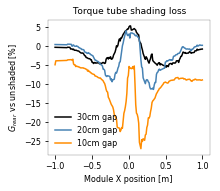

In [43]:
# Plot spatial loss values for 10cm and 30cm data
    
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Helvetica']
plt.rcParams['axes.linewidth'] = 0.2 #set the value globally

fig = plt.figure()
fig.set_size_inches(3, 2.5)
ax = fig.add_axes((0.2,0.15,0.75,0.75))
#plt.rc('font', family='sans-serif')
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc('axes',labelsize=8)
plt.plot(np.linspace(-1,1,unsh_back.__len__()),(cm30_back - unsh_back)/unsh_back*100, label = '30cm gap',color = 'black')  #steelblue
plt.plot(np.linspace(-1,1,unsh_back.__len__()),(cm20_back - unsh_back)/unsh_back*100, label = '20cm gap', color = 'steelblue')  #steelblue
plt.plot(np.linspace(-1,1,unsh_back.__len__()),(cm10_back - unsh_back)/unsh_back*100, label = '10cm gap',color = 'darkorange')  #steelblue
plt.ylabel('$G_{rear}$ vs unshaded [%]')#(r'$BG_E$ [%]')
plt.xlabel('Module X position [m]')
plt.legend(fontsize = 8,frameon = False,loc='best')
#plt.ylim([0, 15])
plt.title('Torque tube shading loss',fontsize=9)
#plt.annotate('South',xy=(-10,9.5),fontsize = 8); plt.annotate('North',xy=(8,9.5),fontsize = 8)
plt.show()